In [52]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
from PIL import Image
import requests
import os
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download the set of stopwords from nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/amwright/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amwright/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
data_path = '../data/raw/news/'
news_articles = next(os.walk(data_path))[2]

articles = []
for file in news_articles:
    with open(f'{data_path}{file}', 'r') as file:
        try:
            raw_article = file.read()
            paragraphs = raw_article.split('\n\n')
            date = '_'.join(file.name.split('/')[-1].split('_')[1:3]).split('.')[0]
            header = paragraphs[0]
            body = ' '.join(paragraphs[1:])
            articles.append([date, header, body])
        except Exception as e:
            continue

print(f"# Articles: {len(articles)}")

# Articles: 26


In [60]:
data = pd.DataFrame(articles, columns=['date','header','body'])
display(data.head(10))

,date,header,body
0,jan_2002,"When 401(k)s Are KO'd\nAs Enron collapsed, so ...",Marie Thibaut spent 15 years as an administrat...
1,jan_2002,One Plus One Makes What?\nThe accounting profe...,Where were the auditors? People ask that quest...
2,jan_2002,Caught Off Balance\nBond sleuths were ahead on...,"If you learn nothing else from the Enron mess,..."
3,mar_2002,Congress Goes All Enron All The Time\nHere are...,Watergate spawned campaign-finance reform and ...
4,feb_2002,Monster Mess\nThe Enron fallout has just begun...,"Anytime a stock market bubble bursts, a busine..."
5,dec_2001,"Enron's Cow\nFORTUNE\nMonday, December 24, 200...",Maybe Enron's downfall shouldn't have come as ...
6,dec_2001,"Enron Fallout: Wide, But Not Deep\nEnron's col...",In a bland suburban office park 30 minutes nor...
7,mar_2001,Is Enron Overpriced?\nIt's in a bunch of compl...,"In Hollywood parlance, the “It Girl” is someon..."
8,feb_2002,Dirty Rotten Numbers\nEnron has made us shine ...,In E.B. White's classic children's book Charlo...
9,may_2000,Winning the War to Keep Top Talent,"By Nicholas Stein Enron Houston; 18,000 employ..."


In [61]:
data['header'] = data.apply(lambda row: row['header'].split('FORTUNE')[0].strip().replace('\n',' - '), axis=1)
data['date'] = pd.to_datetime(data['date'], format='%b_%Y')
display(data.head())

,date,header,body
0,2002-01-01,"When 401(k)s Are KO'd - As Enron collapsed, so...",Marie Thibaut spent 15 years as an administrat...
1,2002-01-01,One Plus One Makes What? - The accounting prof...,Where were the auditors? People ask that quest...
2,2002-01-01,Caught Off Balance - Bond sleuths were ahead o...,"If you learn nothing else from the Enron mess,..."
3,2002-03-01,Congress Goes All Enron All The Time - Here ar...,Watergate spawned campaign-finance reform and ...
4,2002-02-01,Monster Mess - The Enron fallout has just begu...,"Anytime a stock market bubble bursts, a busine..."


In [84]:
def generate_wordcloud(df):
    text = ' '.join(df.body.tolist())

    # Tokenize the text
    tokens = word_tokenize(text)
    tokens = [x for x in tokens if x not in ["s","n't","'s"]]
    tokens_combined = ' '.join(tokens)

    # Get the list of stopwords
    stopwords = list(STOPWORDS)
    additional_stopwords = ['company','companies','firm','']

    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(tokens_combined)

    return wordcloud

In [85]:
article_months = data.date.unique().tolist()
word_clouds = []

for month in article_months:
    subset_data = data[data['date'] == month]
    word_cloud = generate_wordcloud(subset_data)
    word_clouds.append(word_cloud)
    break

["didn't", "isn't", 'if', 'with', 'theirs', 'it', 'you', 'each', "let's", 'into', "wasn't", 'ours', "haven't", "don't", 'why', 'during', 'himself', 'their', "you'll", 'i', 'therefore', "when's", 'being', 'to', "he's", 'a', 'has', 'through', 'how', "what's", 'by', 'off', 'most', "why's", 'cannot', 'for', 'who', "i'd", "who's", "we've", 'but', "shouldn't", "he'll", 'our', 'up', 'more', 'was', "that's", 'themselves', 'same', 'when', "mustn't", 'other', 'would', 'k', 'very', "aren't", 'my', 'am', 'however', 'do', 'had', 'so', "i've", 'also', 'been', "you're", 'such', 'what', 'ever', 'further', 'r', "weren't", 'out', "there's", 'because', "he'd", "how's", 'then', 'in', 'own', 'otherwise', 'doing', 'before', "they'll", 'like', "where's", 'is', 'both', 'get', 'his', 'those', "we'll", 'all', 'its', 'at', 'since', 'yourself', "they're", "we're", 'are', 'can', "you'd", 'http', 'down', 'an', 'these', "couldn't", 'under', "here's", 'be', "hasn't", 'hers', 'www', 'some', 'where', 'have', 'me', 'fro

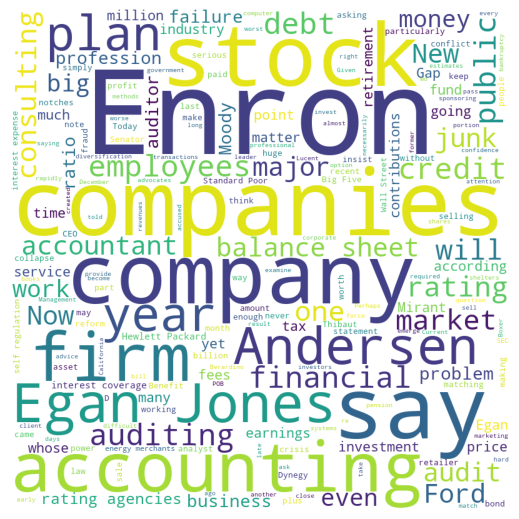

In [86]:
plt.figure(figsize = (5, 5), facecolor = 'white', edgecolor='blue') 
plt.imshow(word_clouds[0]) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()